# Task 1 - Prediction price of plot as per square feet area
## Given Problem Statement
-- A simple linear regression task involving 2 variables, we need to predict the price as per sqrft area.
-- What will be predicted price if a the plot size is 3000 and will only one depended variable is enough to predict the Price?

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-data/kc_house_data.csv


# Step 1 : Importing required libraries

In [2]:
# Importan Lib
import pandas as pd

# Libraries for Visualization
import plotly.express as px
import matplotlib.pyplot as plt 
# data viz lib
import seaborn as sns # not used in this code
# data viz lib
import numpy as np 
# numneric calculation

# Library for splitting the data in Train and Test
from sklearn.model_selection import train_test_split

# Library required for the Linear Regression Algorithm
from sklearn.linear_model import LinearRegression

# Library for the metric required to evaluate the model
from sklearn.metrics import mean_absolute_error

%matplotlib inline 
# allow to plot the charts inline

# Step 2 : Reading the data into a Pandas Dataframe

In [3]:
import os
os.getcwd()

'/kaggle/working'

In [4]:
df = pd.read_csv('/kaggle/input/house-data/kc_house_data.csv')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1317,4037800140,20140814T000000,548000.0,4,2.00,2100,8880,1.0,0,0,...,7,2100,0,1958,0,98008,47.6115,-122.124,1280,9102
19981,1489300215,20141013T000000,1210000.0,4,3.25,3330,9000,2.0,0,0,...,9,2870,460,2004,0,98033,47.6836,-122.208,2550,6349
6083,2473480780,20150311T000000,320000.0,3,2.25,1880,7350,1.0,0,0,...,8,1390,490,1984,0,98058,47.4457,-122.123,1910,8400
7197,717000225,20141028T000000,235000.0,2,2.00,870,6450,1.0,0,0,...,6,740,130,1954,0,98118,47.5354,-122.278,1640,5775
7152,4037200585,20140723T000000,394950.0,3,2.50,1090,7700,1.0,0,0,...,7,1090,0,1957,0,98008,47.6070,-122.120,1740,7700
5597,8650300130,20140908T000000,630000.0,4,2.50,2540,4727,2.0,0,0,...,9,2540,0,1999,0,98034,47.7034,-122.236,3640,5129
880,5101405335,20140826T000000,414900.0,3,1.50,1260,9570,1.0,0,0,...,7,870,390,1941,0,98115,47.7004,-122.305,1620,7000
7520,1049000740,20141120T000000,229950.0,2,1.50,1160,1848,2.0,0,0,...,7,1160,0,1972,0,98034,47.7366,-122.176,1160,1566
3367,9558020600,20150407T000000,425000.0,4,2.50,2460,5440,2.0,0,0,...,9,2460,0,2003,0,98058,47.4480,-122.121,2460,5124
7961,5101405331,20140502T000000,495000.0,4,1.75,1600,6380,1.0,0,0,...,8,1130,470,1959,0,98125,47.7010,-122.306,1090,6380


# Step 3 : Understanding the data

In [7]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
df.shape

(21613, 21)

In [10]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Exploring the data

In [11]:
df_new = pd.DataFrame(df.price )
df_new['sqft_living'] = df.sqft_living

In [12]:
df_new.head()

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680


In [13]:
df_new.shape

(21613, 2)

In [14]:
df_new.isnull().sum()

price          0
sqft_living    0
dtype: int64

In [15]:
fig = px.scatter(x = df_new.price, y = df_new.sqft_living, labels = {'x' : 'price', 'y' : 'sqft_living'}, trendline="ols")
fig.data[1].line.color = 'red'
fig.show()

##### conclusion - 1 outlier is present 

In [16]:
df_new.loc[(df_new.sqft_living>13000)] 

,price,sqft_living
12777,2280000.0,13540


In [17]:
df_new.drop(df_new.query("sqft_living > 13000").index, inplace=True)

In [18]:
df_new.shape

(21612, 2)

In [19]:
fig = px.scatter(x = df_new.price, y = df_new.sqft_living, labels = {'x' : 'price', 'y' : 'sqft_living'}, trendline="ols")
fig.data[1].line.color = 'red'
fig.show()

# Next Step - Splitting the dataset into Train and Test data

In [20]:
feature = df_new.sqft_living.values
target = df_new.price.values

In [21]:
feature = feature.reshape(-1,1)
target = target.reshape(-1,1)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size = 0.2, random_state = 0)
print("X-Train :",X_train.shape)
print("X-Test :",X_test.shape)
print("Y-Train :",Y_test.shape)
print("Y-Test :",Y_test.shape)

X-Train : (17289, 1)
X-Test : (4323, 1)
Y-Train : (4323, 1)
Y-Test : (4323, 1)


# Next step - Implementing the Linear Regression Algorithm

In [23]:
# Instantiating the object of the class
lr = LinearRegression()

# Fitting the model
lr.fit(X_train, Y_train)

LinearRegression()

### Plotting the Regression Line with Actual vs Predicted values

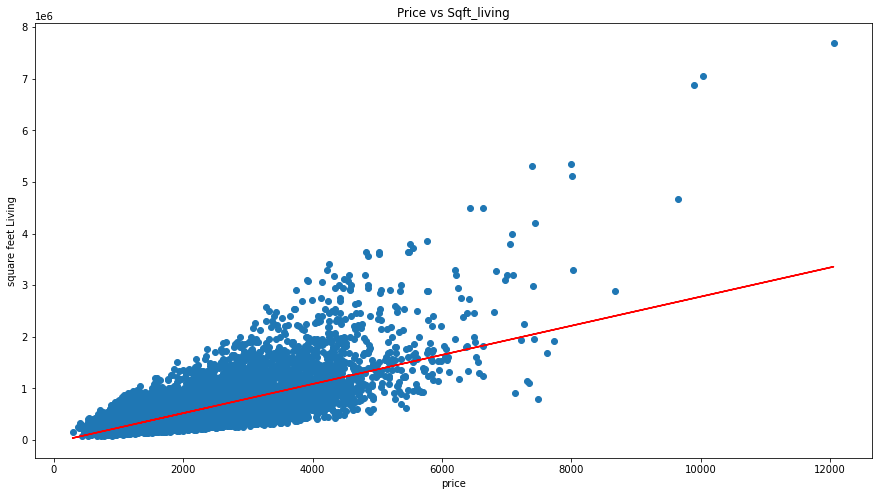

In [24]:
plt.figure(figsize = (15,8))
plt.scatter(X_train, Y_train)
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.title('Price vs Sqft_living')
plt.xlabel('price')
plt.ylabel('square feet Living')
plt.show()

#### Predicting the values

In [25]:
pred_vals = lr.predict(X_test)
pred_vals

array([[1045528.42626356],
       [ 314046.5628408 ],
       [ 921261.23711066],
       ...,
       [ 949503.78009995],
       [ 260385.73116114],
       [ 746157.47057702]])

#### Creating a dataframe with Actual and Predicted Values

In [26]:
df_ac_vs_pr = pd.DataFrame(pred_vals, index = range(0,4323), columns = ['Predicted'])
df_ac_vs_pr['Actual'] = Y_test

In [27]:
df_ac_vs_pr.head()

,Predicted,Actual
0,1.045528e+06,900000.0
1,3.140466e+05,405000.0
2,9.212612e+05,780000.0
3,6.902372e+05,379950.0
4,7.969940e+05,1061600.0


# Next Step - Evaluating the performance of the model

In [28]:
print('Mean Absolute Error =', mean_absolute_error(Y_test, pred_vals))

Mean Absolute Error = 173617.22853030873


# Finding the solution of question asked in the problem statement

In [29]:
# Defining variable 'y' with given data
y = np.array(3000)
y = y.reshape(-1, 1)

# Predicting on the basis of the value in 'y'
pred_y = lr.predict(y)
pred_y

array([[799818.30225669]])

In [30]:
print('The score obtained after studying for {} hours = {}'.format(y[0][0], pred_y[0][0]))

The score obtained after studying for 3000 hours = 799818.3022566854


### Calculation MAPE

In [31]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [32]:
mape(Y_test, pred_vals)

35.8170035842334

### # Conclusion - as MAPE is 36% , that means sqft_living alone is not responsible for Proce veriation. 